In [3]:
import ast

def parse_triplets(line):
    """Parse line to extract text and triplets"""
    parts = line.split('#### #### ####')
    text = parts[0].strip()
    triplets_str = parts[1].strip() if len(parts) > 1 else '[]'
    try:
        triplets = ast.literal_eval(triplets_str) if triplets_str != '[]' else []
    except:
        triplets = []
    
    # Normalize triplets to list of (aspect, opinion, polarity)
    normalized = []
    if triplets:
        if isinstance(triplets[0], (list, tuple)):  # Multiple triplets
            for t in triplets:
                if len(t) == 3:
                    aspect = tuple(t[0]) if isinstance(t[0], list) else (t[0],)
                    opinion = tuple(t[1]) if isinstance(t[1], list) else (t[1],)
                    normalized.append((aspect, opinion, t[2]))
        elif len(triplets) == 3:  # Single triplet
            aspect = tuple(triplets[0]) if isinstance(triplets[0], list) else (triplets[0],)
            opinion = tuple(triplets[1]) if isinstance(triplets[1], list) else (triplets[1],)
            normalized.append((aspect, opinion, triplets[2]))
    
    return text, normalized

def calculate_metrics(pred_file, test_file):
    # Load and parse files
    with open(test_file, 'r', encoding='utf-8') as f:
        test_data = [parse_triplets(line) for line in f if line.strip()]
    
    with open(pred_file, 'r', encoding='utf-8') as f:
        pred_data = [parse_triplets(line) for line in f if line.strip()]
    
    if len(test_data) != len(pred_data):
        print(f"Warning: Jumlah baris tidak sama (test: {len(test_data)}, pred: {len(pred_data)})")
    
    stats = {
        'total_test': 0,
        'total_pred': 0,
        'correct': 0,
        'wrong': 0,
        'missed': 0
    }
    
    for (test_text, test_triplets), (pred_text, pred_triplets) in zip(test_data, pred_data):
        if test_text != pred_text:
            continue
        
        stats['total_test'] += len(test_triplets)
        stats['total_pred'] += len(pred_triplets)
        
        # Convert to sets of tuples for comparison
        test_set = set()
        for aspect, opinion, polarity in test_triplets:
            test_set.add((frozenset(aspect), frozenset(opinion), polarity))
        
        pred_set = set()
        for aspect, opinion, polarity in pred_triplets:
            pred_set.add((frozenset(aspect), frozenset(opinion), polarity))
        
        stats['correct'] += len(test_set & pred_set)
        stats['wrong'] += len(pred_set - test_set)
        stats['missed'] += len(test_set - pred_set)
    
    return stats

# Contoh penggunaan
pred_files = {
    'IndoBERTweet': 'multi word.txt',
    'IndoBERT': 'multi word.txt',
    'IndoBERT-P1': 'multi word.txt',
    'mBERT': 'multi word.txt'
}

test_file = 'test (1).txt'

print("| Skenario | multi word | multi word | multi word | multi word |")
print("|---|---|---|---|---|")
print("| Total Prediksi |", end="")
for name in pred_files:
    stats = calculate_metrics(pred_files[name], test_file)
    print(f" {stats['total_pred']} |", end="")
print("\n| Total Test |", end="")
for name in pred_files:
    stats = calculate_metrics(pred_files[name], test_file)
    print(f" {stats['total_test']} |", end="")
print("\n| Prediksi Benar |", end="")
for name in pred_files:
    stats = calculate_metrics(pred_files[name], test_file)
    print(f" {stats['correct']} |", end="")
print("\n| Prediksi Salah |", end="")
for name in pred_files:
    stats = calculate_metrics(pred_files[name], test_file)
    print(f" {stats['wrong']} |", end="")
print("\n| Tidak diprediksi |", end="")
for name in pred_files:
    stats = calculate_metrics(pred_files[name], test_file)
    print(f" {stats['missed']} |", end="")
print()

| Skenario | multi word | multi word | multi word | multi word |
|---|---|---|---|---|
| Total Prediksi | 458 | 458 | 458 | 458 |
| Total Test | 487 | 487 | 487 | 487 |
| Prediksi Benar | 227 | 227 | 227 | 227 |
| Prediksi Salah | 231 | 231 | 231 | 231 |
| Tidak diprediksi | 260 | 260 | 260 | 260 |


In [5]:
import ast

def parse_triplets(line):
    """Parse line to extract text and triplets"""
    parts = line.split('#### #### ####')
    text = parts[0].strip()
    triplets_str = parts[1].strip() if len(parts) > 1 else '[]'
    try:
        triplets = ast.literal_eval(triplets_str) if triplets_str != '[]' else []
    except:
        triplets = []
    
    # Normalize triplets to list of (aspect, opinion)
    normalized = []
    if triplets:
        if isinstance(triplets[0], (list, tuple)):  # Multiple triplets
            for t in triplets:
                if len(t) >= 2:  # Only need aspect and opinion
                    aspect = tuple(t[0]) if isinstance(t[0], list) else (t[0],)
                    opinion = tuple(t[1]) if isinstance(t[1], list) else (t[1],)
                    normalized.append((aspect, opinion))
        elif len(triplets) >= 2:  # Single triplet
            aspect = tuple(triplets[0]) if isinstance(triplets[0], list) else (triplets[0],)
            opinion = tuple(triplets[1]) if isinstance(triplets[1], list) else (triplets[1],)
            normalized.append((aspect, opinion))
    
    return text, normalized

def count_correct_aspect_opinion_pairs(pred_file, test_file):
    # Load and parse files
    with open(test_file, 'r', encoding='utf-8') as f:
        test_data = [parse_triplets(line) for line in f if line.strip()]
    
    with open(pred_file, 'r', encoding='utf-8') as f:
        pred_data = [parse_triplets(line) for line in f if line.strip()]
    
    if len(test_data) != len(pred_data):
        print(f"Warning: Jumlah baris tidak sama (test: {len(test_data)}, pred: {len(pred_data)})")
    
    stats = {
        'total_test_pairs': 0,
        'total_pred_pairs': 0,
        'correct_pairs': 0,
        'incorrect_pairs': 0,
        'missed_pairs': 0
    }
    
    for (test_text, test_pairs), (pred_text, pred_pairs) in zip(test_data, pred_data):
        if test_text != pred_text:
            continue
        
        stats['total_test_pairs'] += len(test_pairs)
        stats['total_pred_pairs'] += len(pred_pairs)
        
        # Convert to sets of aspect-opinion pairs for comparison
        test_set = set(test_pairs)
        pred_set = set(pred_pairs)
        
        # Count correct pairs (aspect and opinion match, regardless of order)
        stats['correct_pairs'] += len(test_set & pred_set)
        # Count incorrect predictions (pairs in pred but not in test)
        stats['incorrect_pairs'] += len(pred_set - test_set)
        # Count missed pairs (pairs in test but not in pred)
        stats['missed_pairs'] += len(test_set - pred_set)
    
    return stats

# Contoh penggunaan
test_file = 'test.txt'
pred_file = 'single word.txt'

stats = count_correct_aspect_opinion_pairs(pred_file, test_file)

print("Hasil Perbandingan Pasangan Aspek-Opini:")
print(f"Total pasangan dalam test: {stats['total_test_pairs']}")
print(f"Total pasangan dalam prediksi: {stats['total_pred_pairs']}")
print(f"Pasangan yang benar: {stats['correct_pairs']} ({stats['correct_pairs']/stats['total_test_pairs']*100:.2f}%)")
print(f"Pasangan yang salah: {stats['incorrect_pairs']}")
print(f"Pasangan yang terlewat: {stats['missed_pairs']}")

Hasil Perbandingan Pasangan Aspek-Opini:
Total pasangan dalam test: 128
Total pasangan dalam prediksi: 147
Pasangan yang benar: 91 (71.09%)
Pasangan yang salah: 56
Pasangan yang terlewat: 37


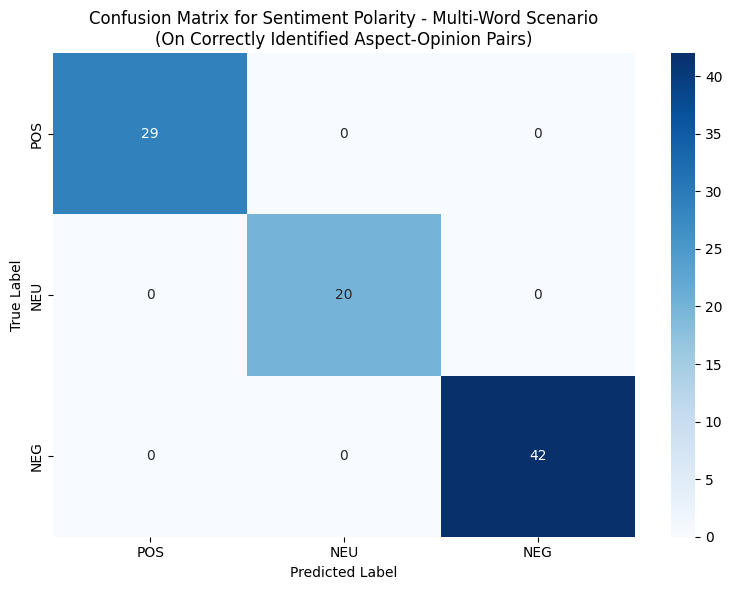

Confusion Matrix:
     POS  NEU  NEG
POS   29    0    0
NEU    0   20    0
NEG    0    0   42


In [9]:
import ast
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def parse_triplets_with_polarity(line):
    """Parse line to extract text and triplets including polarity"""
    parts = line.split('#### #### ####')
    text = parts[0].strip()
    triplets_str = parts[1].strip() if len(parts) > 1 else '[]'
    try:
        triplets = ast.literal_eval(triplets_str) if triplets_str != '[]' else []
    except:
        triplets = []
    
    # Normalize triplets to list of (aspect, opinion, polarity)
    normalized = []
    if triplets:
        if isinstance(triplets[0], (list, tuple)):  # Multiple triplets
            for t in triplets:
                if len(t) == 3:
                    aspect = tuple(t[0]) if isinstance(t[0], list) else (t[0],)
                    opinion = tuple(t[1]) if isinstance(t[1], list) else (t[1],)
                    normalized.append((aspect, opinion, t[2]))
        elif len(triplets) == 3:  # Single triplet
            aspect = tuple(triplets[0]) if isinstance(triplets[0], list) else (triplets[0],)
            opinion = tuple(triplets[1]) if isinstance(triplets[1], list) else (triplets[1],)
            normalized.append((aspect, opinion, triplets[2]))
    
    return text, normalized

def generate_confusion_matrix(pred_file, test_file):
    # Load and parse files
    with open(test_file, 'r', encoding='utf-8') as f:
        test_data = [parse_triplets_with_polarity(line) for line in f if line.strip()]
    
    with open(pred_file, 'r', encoding='utf-8') as f:
        pred_data = [parse_triplets_with_polarity(line) for line in f if line.strip()]
    
    # Collect matching pairs with their polarities
    true_labels = []
    pred_labels = []
    
    for (test_text, test_triplets), (pred_text, pred_triplets) in zip(test_data, pred_data):
        if test_text != pred_text:
            continue
        
        # Convert to dictionaries for easy lookup
        test_dict = {(tuple(t[0]), tuple(t[1])): t[2] for t in test_triplets}
        pred_dict = {(tuple(t[0]), tuple(t[1])): t[2] for t in pred_triplets}
        
        # Find matching aspect-opinion pairs
        common_pairs = set(test_dict.keys()) & set(pred_dict.keys())
        
        for pair in common_pairs:
            true_labels.append(test_dict[pair])
            pred_labels.append(pred_dict[pair])
    
    # Define sentiment classes and order
    classes = ['POS', 'NEU', 'NEG']
    
    # Generate confusion matrix
    cm = confusion_matrix(true_labels, pred_labels, labels=classes)
    
    # Create dataframe for better visualization
    cm_df = pd.DataFrame(cm, index=classes, columns=classes)
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', 
                xticklabels=classes, yticklabels=classes)
    plt.title('Confusion Matrix for Sentiment Polarity - Multi-Word Scenario\n(On Correctly Identified Aspect-Opinion Pairs)')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    
    # Save and show plot
    plt.savefig('confusion_matrix.png')
    plt.show()
    
    return cm_df

# Contoh penggunaan
test_file = 'test.txt'
pred_file = 'single word.txt'

conf_matrix = generate_confusion_matrix(pred_file, test_file)
print("Confusion Matrix:")
print(conf_matrix)

In [11]:
import pandas as pd
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

def calculate_extended_metrics(true_labels, pred_labels, classes):
    # Hitung metrik per kelas
    precision, recall, f1, support = precision_recall_fscore_support(
        true_labels, pred_labels, labels=classes, zero_division=0)
    
    # Hitung accuracy overall
    accuracy = accuracy_score(true_labels, pred_labels)
    
    # Buat DataFrame untuk metrik per kelas
    class_metrics = pd.DataFrame({
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Support': support
    }, index=classes)
    
    # Hitung weighted average untuk overall
    weighted_avg = pd.DataFrame({
        'Precision': [sum(precision * support) / sum(support)],
        'Recall': [sum(recall * support) / sum(support)],
        'F1-Score': [sum(f1 * support) / sum(support)],
        'Support': [sum(support)],
        'Accuracy': [accuracy]
    }, index=['Overall'])
    
    # Gabungkan hasil
    full_metrics = pd.concat([class_metrics, weighted_avg])
    
    return full_metrics

# Kelas sentimen
classes = ['POS', 'NEU', 'NEG']

# Data Single Word (SW) - Perfect classification
true_sw = ['POS']*29 + ['NEU']*20 + ['NEG']*42
pred_sw = ['POS']*29 + ['NEU']*20 + ['NEG']*42  # All correct

# Data Multi Word (MW) - With some misclassifications
true_mw = (['POS']*69 + ['NEU']*95 + ['NEG']*119)  # POS=62+6+1, NEU=0+88+7, NEG=2+1+116
pred_mw = (['POS']*62 + ['NEU']*6 + ['NEG']*1 +  # Actual POS predicted as POS/NEU/NEG
           ['NEU']*0 + ['NEU']*88 + ['NEG']*7 +  # Actual NEU predicted as POS/NEU/NEG
           ['POS']*2 + ['NEU']*1 + ['NEG']*116)  # Actual NEG predicted as POS/NEU/NEG

# Hitung metrik
sw_metrics = calculate_extended_metrics(true_sw, pred_sw, classes)
mw_metrics = calculate_extended_metrics(true_mw, pred_mw, classes)

# Gabungkan hasil untuk perbandingan
comparison_df = pd.concat({
    'Single Word': sw_metrics,
    'Multi Word': mw_metrics
}, axis=1)

# Reorganisasi kolom
comparison_df = comparison_df.swaplevel(axis=1)[['Precision', 'Recall', 'F1-Score', 'Accuracy', 'Support']]
comparison_df = comparison_df.sort_index(axis=1)

# Format tampilan
pd.options.display.float_format = '{:.3f}'.format
print("Perbandingan Lengkap Metrik Evaluasi:")
print(comparison_df)

# Simpan ke file
comparison_df.to_excel('perbandingan_metrik_sentimen.xlsx')
# print("\nHasil telah disimpan ke 'perbandingan_metrik_sentimen.xlsx'")

Perbandingan Lengkap Metrik Evaluasi:
          Accuracy               F1-Score              Precision              \
        Multi Word Single Word Multi Word Single Word Multi Word Single Word   
POS            nan         nan      0.932       1.000      0.969       1.000   
NEU            nan         nan      0.926       1.000      0.926       1.000   
NEG            nan         nan      0.955       1.000      0.935       1.000   
Overall      0.940       1.000      0.940       1.000      0.941       1.000   

            Recall                Support              
        Multi Word Single Word Multi Word Single Word  
POS          0.899       1.000         69          29  
NEU          0.926       1.000         95          20  
NEG          0.975       1.000        119          42  
Overall      0.940       1.000        283          91  


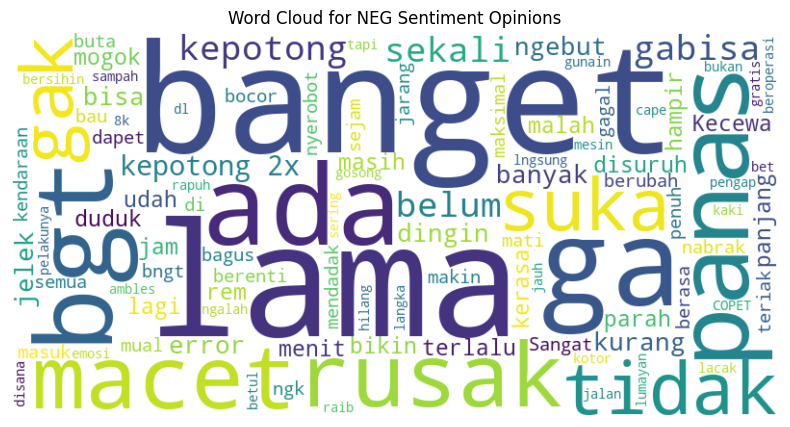

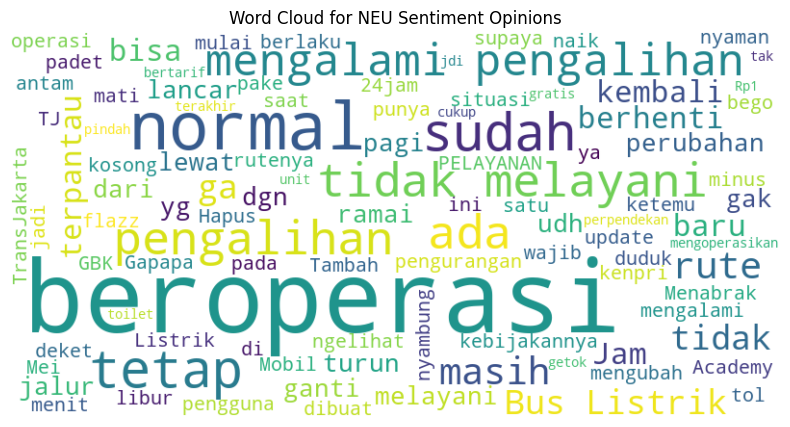

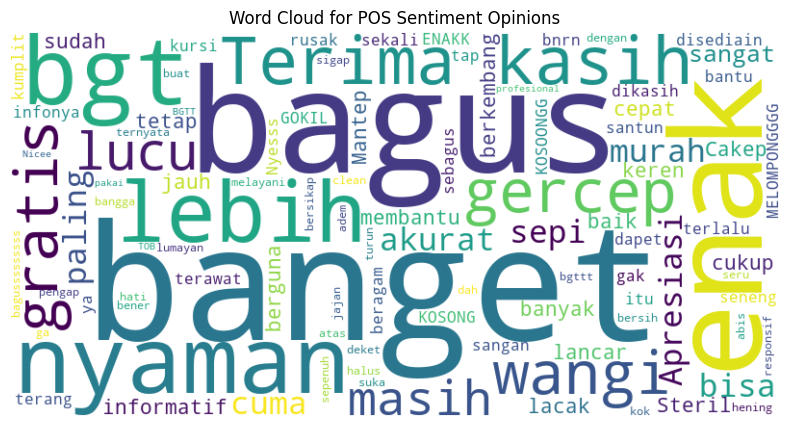

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import defaultdict
import ast

def extract_opinions_by_sentiment(file_path):
    sentiment_opinions = defaultdict(list)
    
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            if not line.strip():
                continue
                
            # Split text and annotations
            parts = line.split('#### #### ####')
            if len(parts) < 2:
                continue
                
            text = parts[0].strip()
            words = text.split()
            annotations = parts[1].strip()
            
            try:
                triplets = ast.literal_eval(annotations)
                if not isinstance(triplets, list):
                    triplets = [triplets]
                    
                for triplet in triplets:
                    if len(triplet) == 3:
                        aspect_indices = triplet[0] if isinstance(triplet[0], list) else [triplet[0]]
                        opinion_indices = triplet[1] if isinstance(triplet[1], list) else [triplet[1]]
                        sentiment = triplet[2]
                        
                        # Extract opinion words
                        opinion_words = [words[i] for i in opinion_indices if i < len(words)]
                        sentiment_opinions[sentiment].extend(opinion_words)
            except:
                continue
                
    return sentiment_opinions

def generate_wordclouds(sentiment_opinions):
    for sentiment, words in sentiment_opinions.items():
        if not words:
            continue
            
        text = ' '.join(words)
        wordcloud = WordCloud(
            width=800,
            height=400,
            background_color='white',
            colormap='viridis',
            max_words=100
        ).generate(text)
        
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f'Word Cloud for {sentiment} Sentiment Opinions')
        plt.axis('off')
        plt.savefig(f'wordcloud_{sentiment}.png', bbox_inches='tight', dpi=300)
        plt.show()

# Contoh penggunaan
file_path = 'test (1).txt'
sentiment_opinions = extract_opinions_by_sentiment(file_path)
generate_wordclouds(sentiment_opinions)

In [13]:
import ast
from collections import defaultdict
from sklearn.metrics import precision_recall_fscore_support

def extract_aspect_indices(line):
    """Extract aspect indices from a line in the file"""
    parts = line.split('#### #### ####')
    if len(parts) < 2:
        return []
    
    annotations = parts[1].strip()
    try:
        triplets = ast.literal_eval(annotations) if annotations != '[]' else []
        if not isinstance(triplets, list):
            triplets = [triplets]
            
        aspect_indices = []
        for triplet in triplets:
            if len(triplet) >= 2:
                aspect = triplet[0] if isinstance(triplet[0], list) else [triplet[0]]
                aspect_indices.extend(aspect)
        return sorted(list(set(aspect_indices)))  # Remove duplicates and sort
    except:
        return []

def calculate_ate_metrics(test_file, pred_file):
    # Initialize counters
    true_positives = 0
    false_positives = 0
    false_negatives = 0
    
    with open(test_file, 'r', encoding='utf-8') as f_test, open(pred_file, 'r', encoding='utf-8') as f_pred:
        for test_line, pred_line in zip(f_test, f_pred):
            if not test_line.strip() or not pred_line.strip():
                continue
                
            # Extract aspect indices
            true_aspects = extract_aspect_indices(test_line)
            pred_aspects = extract_aspect_indices(pred_line)
            
            # Calculate matches (considering partial matches)
            matched = set(true_aspects) & set(pred_aspects)
            true_positives += len(matched)
            false_positives += len(set(pred_aspects) - set(true_aspects))
            false_negatives += len(set(true_aspects) - set(pred_aspects))
    
    # Calculate metrics
    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
    recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    accuracy = true_positives / (true_positives + false_positives + false_negatives) if (true_positives + false_positives + false_negatives) > 0 else 0
    
    return {
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'accuracy': accuracy,
        'true_positives': true_positives,
        'false_positives': false_positives,
        'false_negatives': false_negatives
    }

# Example usage
test_file = 'test (1).txt'
pred_file = 'multi word.txt'

metrics = calculate_ate_metrics(test_file, pred_file)

print("Aspect Term Extraction (ATE) Evaluation Metrics:")
print(f"Precision: {metrics['precision']:.4f}")
print(f"Recall: {metrics['recall']:.4f}")
print(f"F1-Score: {metrics['f1_score']:.4f}")
print(f"Accuracy: {metrics['accuracy']:.4f}")
print(f"\nDetailed Counts:")
print(f"True Positives: {metrics['true_positives']}")
print(f"False Positives: {metrics['false_positives']}")
print(f"False Negatives: {metrics['false_negatives']}")

Aspect Term Extraction (ATE) Evaluation Metrics:
Precision: 0.8438
Recall: 0.7266
F1-Score: 0.7808
Accuracy: 0.6405

Detailed Counts:
True Positives: 497
False Positives: 92
False Negatives: 187


In [15]:
import ast
from collections import defaultdict
from sklearn.metrics import precision_recall_fscore_support

def extract_opinion_indices(line):
    """Extract opinion indices from a line in the file"""
    parts = line.split('#### #### ####')
    if len(parts) < 2:
        return []
    
    annotations = parts[1].strip()
    try:
        triplets = ast.literal_eval(annotations) if annotations != '[]' else []
        if not isinstance(triplets, list):
            triplets = [triplets]
            
        opinion_indices = []
        for triplet in triplets:
            if len(triplet) >= 2:
                opinion = triplet[1] if isinstance(triplet[1], list) else [triplet[1]]
                opinion_indices.extend(opinion)
        return sorted(list(set(opinion_indices)))  # Remove duplicates and sort
    except:
        return []

def calculate_ote_metrics(test_file, pred_file):
    # Initialize counters
    true_positives = 0
    false_positives = 0
    false_negatives = 0
    
    with open(test_file, 'r', encoding='utf-8') as f_test, open(pred_file, 'r', encoding='utf-8') as f_pred:
        for test_line, pred_line in zip(f_test, f_pred):
            if not test_line.strip() or not pred_line.strip():
                continue
                
            # Extract opinion indices
            true_opinions = extract_opinion_indices(test_line)
            pred_opinions = extract_opinion_indices(pred_line)
            
            # Calculate matches (considering partial matches)
            matched = set(true_opinions) & set(pred_opinions)
            true_positives += len(matched)
            false_positives += len(set(pred_opinions) - set(true_opinions))
            false_negatives += len(set(true_opinions) - set(pred_opinions))
    
    # Calculate metrics
    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
    recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    accuracy = true_positives / (true_positives + false_positives + false_negatives) if (true_positives + false_positives + false_negatives) > 0 else 0
    
    return {
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'accuracy': accuracy,
        'true_positives': true_positives,
        'false_positives': false_positives,
        'false_negatives': false_negatives
    }

# Example usage
test_file = 'test (1).txt'
pred_file = 'multi word.txt'

metrics = calculate_ote_metrics(test_file, pred_file)

print("Opinion Term Extraction (OTE) Evaluation Metrics:")
print(f"Precision: {metrics['precision']:.4f}")
print(f"Recall: {metrics['recall']:.4f}")
print(f"F1-Score: {metrics['f1_score']:.4f}")
print(f"Accuracy: {metrics['accuracy']:.4f}")
print(f"\nDetailed Counts:")
print(f"True Positives: {metrics['true_positives']}")
print(f"False Positives: {metrics['false_positives']}")
print(f"False Negatives: {metrics['false_negatives']}")

Opinion Term Extraction (OTE) Evaluation Metrics:
Precision: 0.8173
Recall: 0.7101
F1-Score: 0.7599
Accuracy: 0.6128

Detailed Counts:
True Positives: 671
False Positives: 150
False Negatives: 274
